## Домашнее задание 3 (10 баллов)

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [1]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv')
data.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


In [3]:
data.shape

(1000, 21)

### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [4]:
data.isna().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

**Количественные признаки**
duration, amount, age

**Бинарные признаки**
people_liable, telephone, foreign_worker, credit_risk

**Порядковые признаки**
status, credit_history, savings, employment_duration, installment_rate, present_residence, housing, number_credits, job

**Категориальные признаки**
purpose, personal_status_sex, other_debtors, property, other_installment_plans

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [5]:
data.groupby('purpose')['amount'].mean()

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [6]:
rent = data['housing'] == 'rent'
younger_than_30 = data['age'] < 30
elder_than_40 = data['age'] > 40
print(f'Процент клиентов моложе 30 лет, снимающих жилье: {(younger_than_30 & rent).sum() / younger_than_30.sum() * 100:.2f}%',
        f'Процент клиентов старше 40 лет, снимающих жилье: {(elder_than_40 & rent).sum() / elder_than_40.sum() * 100:.2f}%', sep='\n')

Процент клиентов моложе 30 лет, снимающих жилье: 66.67%
Процент клиентов старше 40 лет, снимающих жилье: 68.01%


### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [7]:
foreign = data['foreign_worker'] == 'yes'
depts = (data['number_credits'] == '4-5') | (data['number_credits'] == '>= 6')
print(f'Кол-во иностранцев, у которых число кредитов больше 3: {(foreign & depts).sum()}')

Кол-во иностранцев, у которых число кредитов больше 3: 1


### Задание 6 (1 балл)

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

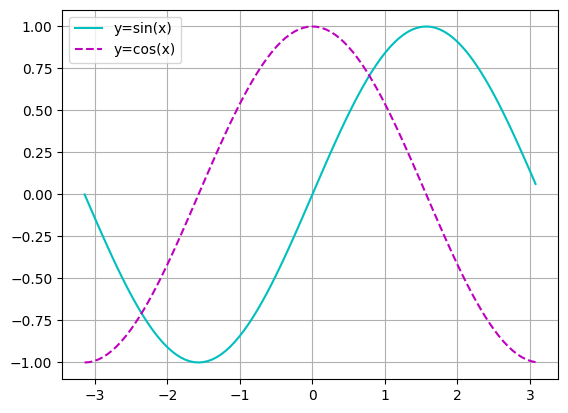

In [9]:
X = np.arange(-np.pi, np.pi, 2 * np.pi / 100)
plt.plot(X, np.sin(X), '-c')
plt.plot( X, np.cos(X), '--m')
plt.legend(['y=sin(x)', 'y=cos(x)'])
plt.grid(True)
plt.show()

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

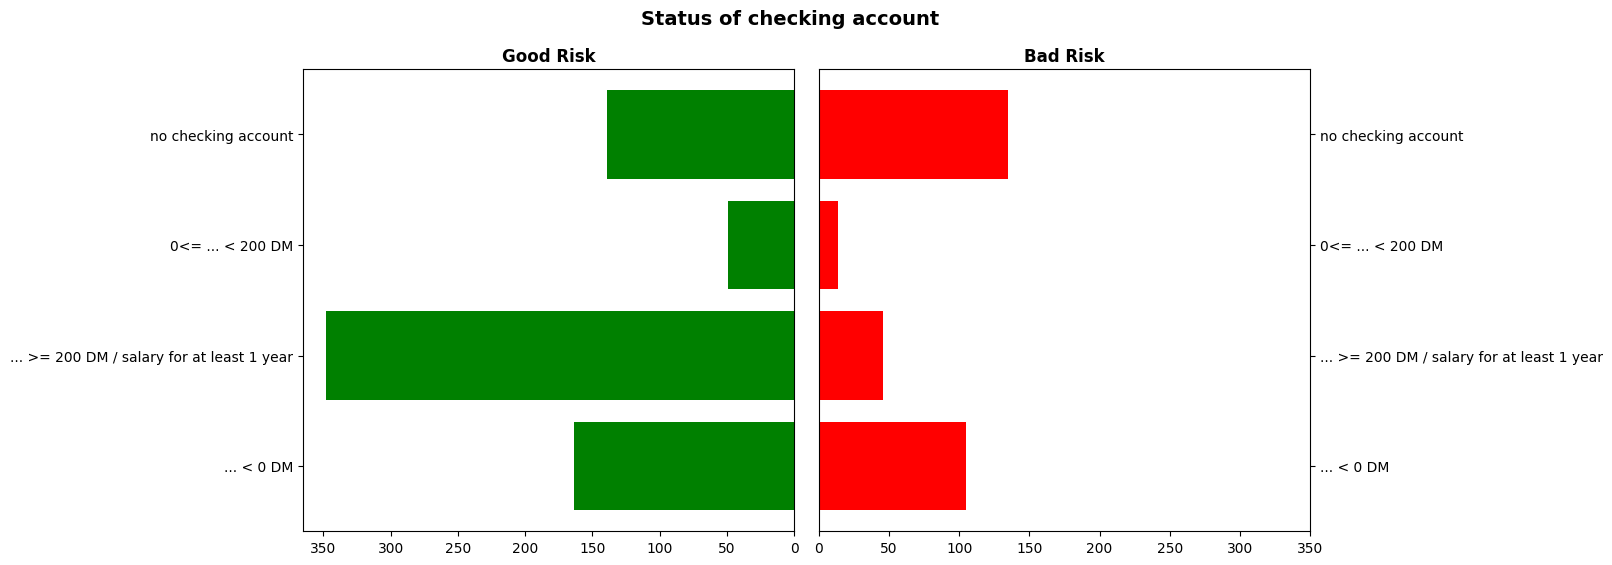

In [10]:
x = data.status.value_counts().sort_index(ascending=True).index.tolist()
good_y = data[data.credit_risk == 'good'].status.value_counts().sort_index(ascending=True).values.tolist()
bad_y = data[data.credit_risk == 'bad'].status.value_counts().sort_index(ascending=True).values.tolist()

fig, (good, bad) = plt.subplots(ncols=2, figsize=(13, 6))
fig.suptitle('Status of checking account', fontsize=14, fontweight='bold')

good.barh(x, good_y, color='g')
good.set_title('Good Risk', fontsize=12, fontweight='bold')
good.invert_xaxis()

bad.barh(x, bad_y, color='r')
bad.set_title('Bad Risk', fontsize=12, fontweight='bold')
bad.set_xlim([0, 350])
bad.yaxis.tick_right()

plt.subplots_adjust(wspace=0.05)
plt.show()

### Задание 8  (0.5 балла)

In [11]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

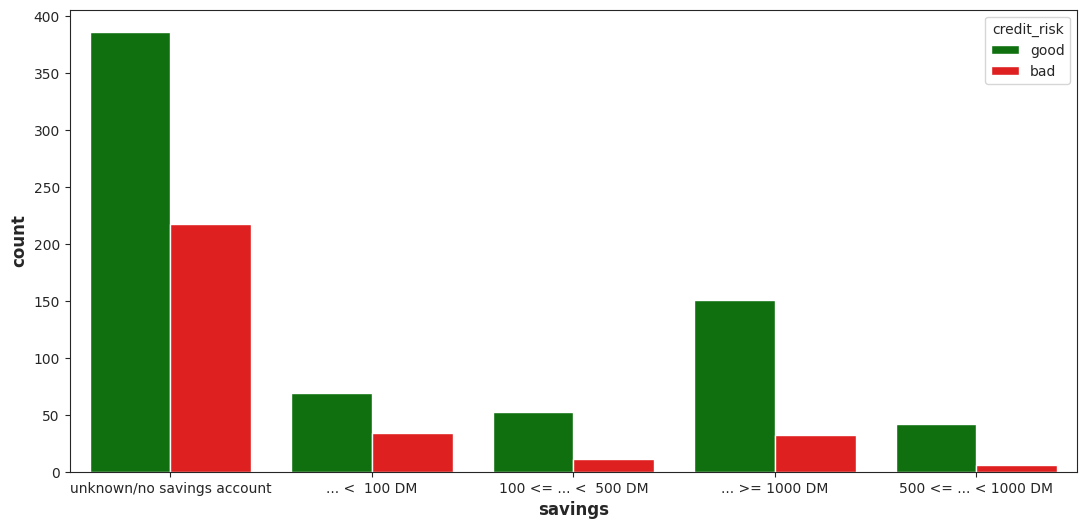

In [12]:
fig = plt.figure(figsize=(13, 6))
sns.set_style('ticks')
sns.countplot(x='savings', hue='credit_risk', palette=['g', 'r'], data=data)
plt.xlabel('savings', fontsize=12, fontweight='bold')
plt.ylabel('count', fontsize=12, fontweight='bold')
plt.show()

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

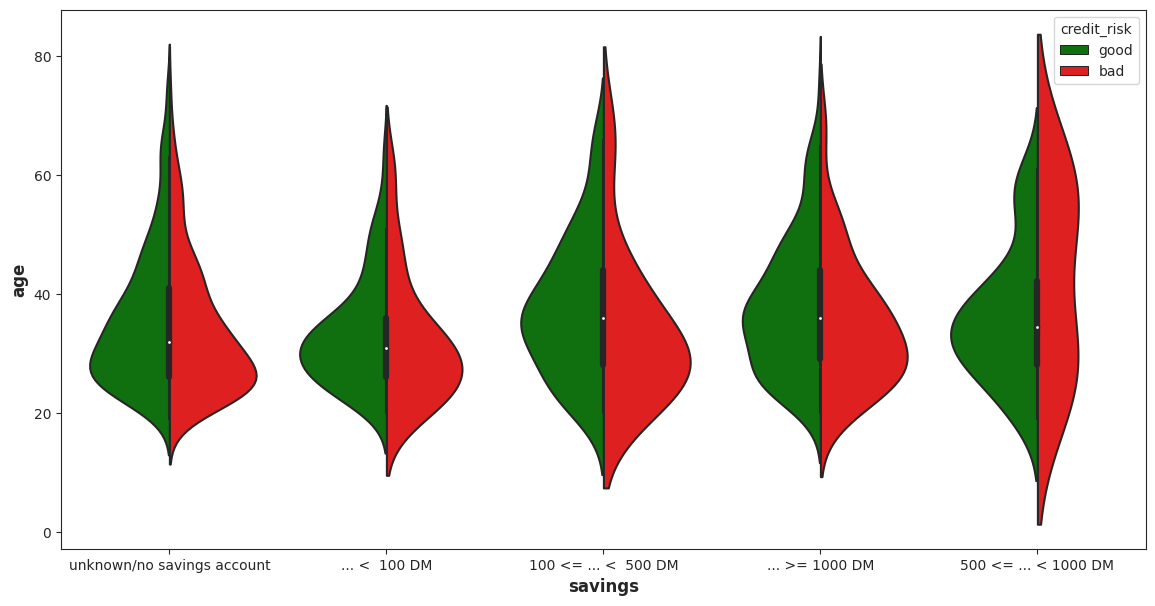

In [13]:
fig = plt.figure(figsize=(14, 7))
sns.set_style('ticks')
sns.violinplot(x='savings', y='age', hue='credit_risk', palette=['g', 'r'], split=True, data=data)
plt.xlabel('savings', fontsize=12, fontweight='bold')
plt.ylabel('age', fontsize=12, fontweight='bold')
plt.show()

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

<ipython-input-14-99971cd1c83b>:16: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([good_age, bad_age, overall_age], labels=labels, bbox_to_anchor=(0.9, 0.88))


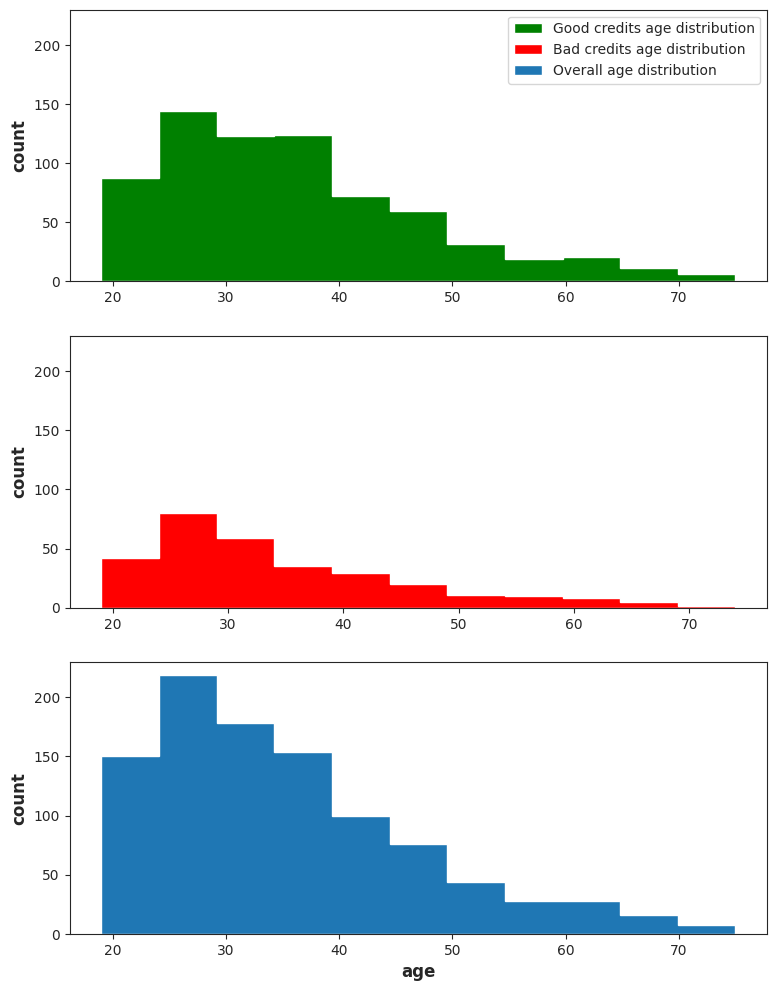

In [14]:
fig, (good_age, bad_age, overall_age) = plt.subplots(nrows=3, figsize=(9, 12), sharey=True)

labels = ['Good credits age distribution', 'Bad credits age distribution', 'Overall age distribution']

good_age.hist(data[data.credit_risk == 'good'].age, bins=11, histtype='stepfilled', color='g')
good_age.set_ylabel('count', fontsize=12, fontweight='bold')

bad_age.hist(data[data.credit_risk == 'bad'].age, bins=11, histtype='stepfilled', color='r')
bad_age.set_ylabel('count', fontsize=12, fontweight='bold')

overall_age.hist(data.age, bins=11, histtype='stepfilled')
overall_age.set_ylabel('count', fontsize=12, fontweight='bold')

plt.ylim(0,230)
plt.xlabel('age', fontsize=12, fontweight='bold')
fig.legend([good_age, bad_age, overall_age], labels=labels, bbox_to_anchor=(0.9, 0.88))
plt.show()

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

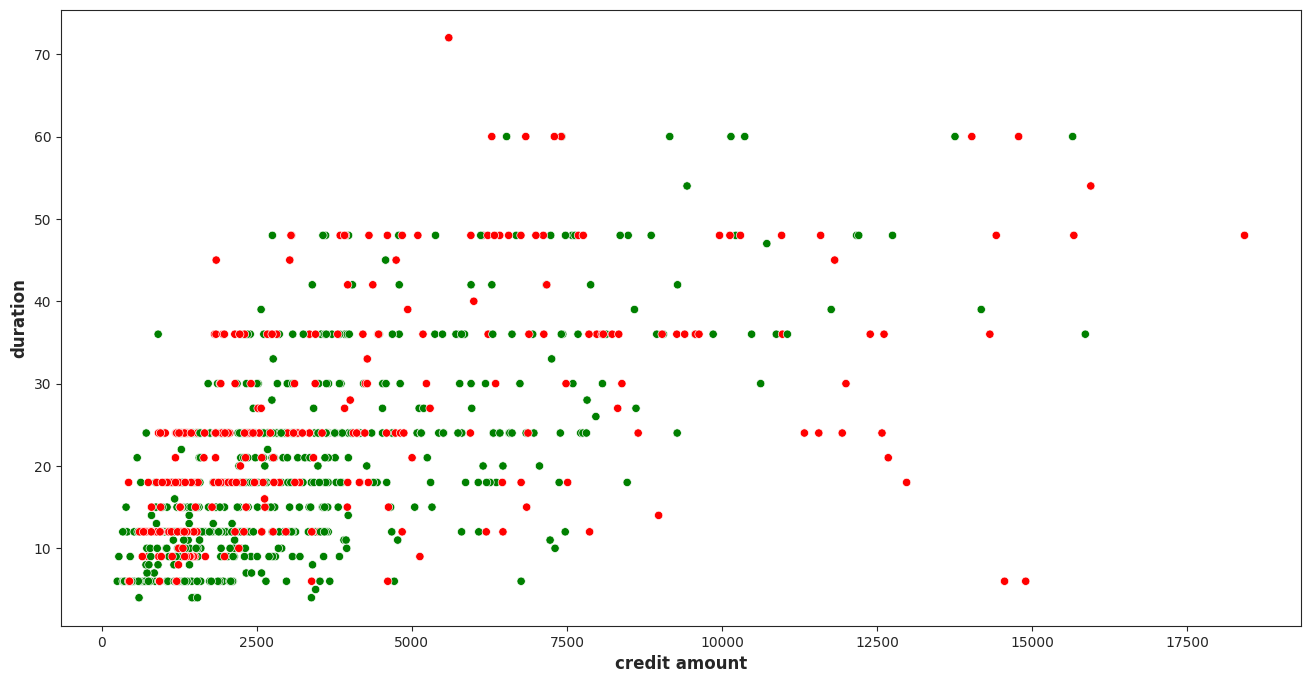

In [15]:
fig = plt.figure(figsize=(16, 8))
sns.set_style('ticks')
sns.scatterplot(x='amount', y='duration', hue='credit_risk', palette=['g', 'r'], legend=False, data=data)
plt.xlabel('credit amount', fontsize=12, fontweight='bold')
plt.ylabel('duration', fontsize=12, fontweight='bold')
plt.show()

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

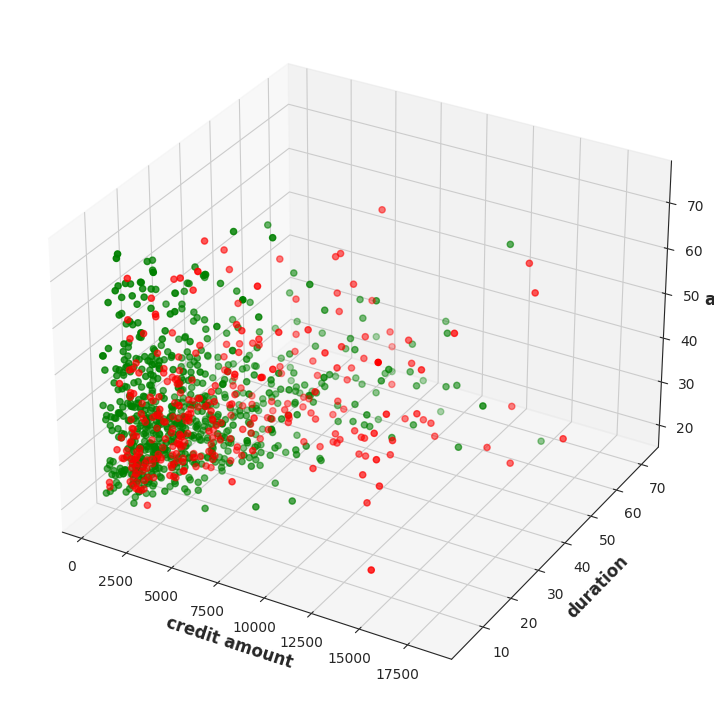

In [16]:
fig = plt.figure(figsize=(9, 9))
plot = plt.axes(projection = '3d')

good_mask = data.credit_risk == 'good'
plot.scatter3D(data[good_mask].amount, data[good_mask].duration, data[good_mask].age, c='g')

bad_mask = data.credit_risk == 'bad'
plot.scatter3D(data[bad_mask].amount, data[bad_mask].duration, data[bad_mask].age, c='r')

plot.set_xlabel('credit amount', fontsize=12, fontweight='bold')
plot.set_ylabel('duration', fontsize=12, fontweight='bold')
plot.set_zlabel('age', fontsize=12, fontweight='bold')

plt.show()

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [17]:
data.people_liable = data.people_liable.apply(lambda x: 0 if x == '0 to 2' else 1)

data.telephone = data.telephone.apply(lambda x: 0 if x == 'no' else 1)

data.foreign_worker = data.foreign_worker.apply(lambda x: 0 if x == 'no' else 1)

data.credit_risk = data.credit_risk.apply(lambda x: 0 if x == 'bad' else 1)

stat = {'... >= 200 DM / salary for at least 1 year': 3,
        '0<= ... < 200 DM': 2,
        '... < 0 DM': 1,
        'no checking account': 0}
data.status = data.status.map(stat)

history = {'no credits taken/all credits paid back duly': 4,
            'all credits at this bank paid back duly': 3,
            'existing credits paid back duly till now': 2,
            'critical account/other credits elsewhere': 1,
            'delay in paying off in the past': 0}
data.credit_history = data.credit_history.map(history)

sav = {'... >= 1000 DM': 4,
        '500 <= ... < 1000 DM': 3,
        '100 <= ... <  500 DM': 2,
        '... <  100 DM': 1,
        'unknown/no savings account': 0}
data.savings = data.savings.map(sav)

employ_dur = {'>= 7 yrs': 4,
                '4 <= ... < 7 yrs': 3,
                '1 <= ... < 4 yrs': 2,
                '< 1 yr': 1,
                'unemployed': 0}
data.employment_duration = data.employment_duration.map(employ_dur)

inst_rate = {'>= 35': 3,
            '25 <= ... < 35': 2,
            '20 <= ... < 25': 1,
            '< 20': 0}
data.installment_rate = data.installment_rate.map(inst_rate)

residence = {'>= 7 yrs': 3,
            '4 <= ... < 7 yrs': 2,
            '1 <= ... < 4 yrs': 1,
            '< 1 yr': 0}
data.present_residence = data.present_residence.map(residence)

house = {'own': 2,
        'rent': 1,
        'for free': 0}
data.housing = data.housing.map(house)

num_credits = {'>= 6': 3,
                '4-5': 2,
                '2-3': 1,
                '1': 0}
data.number_credits = data.number_credits.map(num_credits)

job = {'manager/self-empl./highly qualif. employee': 3,
        'skilled employee/official': 2,
        'unskilled - resident': 1,
        'unemployed/unskilled - non-resident': 0}
data.job = data.job.map(job)

data = pd.get_dummies(data, columns=['purpose', 'personal_status_sex', 'other_debtors', 'property', 'other_installment_plans'])

data.sample(7)

,status,duration,credit_history,amount,savings,employment_duration,installment_rate,present_residence,age,housing,...,other_debtors_co-applicant,other_debtors_guarantor,other_debtors_none,property_building soc. savings agr./life insurance,property_car or other,property_real estate,property_unknown / no property,other_installment_plans_bank,other_installment_plans_none,other_installment_plans_stores
776,1,18,2,4297,0,4,0,2,40,1,...,0,0,1,0,0,1,0,0,1,0
15,0,6,4,2647,2,2,2,2,44,0,...,0,0,1,0,0,0,1,0,1,0
63,3,36,2,10875,0,4,2,1,45,1,...,0,0,1,1,0,0,0,0,1,0
470,3,18,4,1984,0,2,0,3,47,2,...,0,0,1,0,0,1,0,1,0,0
343,3,9,4,3577,1,2,3,1,26,0,...,0,1,0,0,0,0,1,0,1,0
935,0,20,3,2235,0,2,0,1,33,0,...,0,1,0,0,1,0,0,1,0,0
374,3,21,2,1591,1,3,0,2,34,1,...,0,0,1,0,0,0,1,0,1,0


### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [18]:
def predict(Xtest: np.array) -> np.array:
    result = []
    for client in range(len(Xtest)):
        if (Xtest[client][0] > 1) | (Xtest[client][4] > 1) | (Xtest[client][2] > 1): result.append(1)
        else: result.append(0)
    return np.array(result)

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

accuracy_score(y_test, predict(X_test))

<ipython-input-18-be40cd4bb670>:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = data.drop('credit_risk', 1).values


0.696